# SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors) is a powerful statistical time series forecasting model that enhances the ARIMA model's capabilities. In this model seasonal patterns (recurring patterns over specific intervals) and external variables (exogenous regressors) are used to forecast time series data.
## The logic behind the method used is to answer to a question "What if we didn't launch this marketing campaign?" to measure the effect of this campaign. Therefore, the SARIMAX model is used to predict organic consumers for two months when the new marketing campaign was launched. By comparing the predicted number of organic consumers (the model is only trained on data where the new marketing campaign was not launched) and the real data the effect of the new marketing campaign can be estimated and confidence intervals for the forecast can be calculated. 

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import math
import plotly.express as px
import ipywidgets
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score


import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression, LassoCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, chi2
import statsmodels.api as sm
from sklearn.pipeline import Pipeline

#!pip install statsmodels 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

import datetime
from datetime import datetime, timedelta
from calendar import weekday, monthrange

pd.options.display.max_rows=2000
pd.options.display.max_columns=200
pd.options.display.max_seq_items=200
pd.set_option('display.float_format', '{:.3f}'.format) 

In [ ]:
final_table =  pd.read_excel(f'Data_for_SARIMAX.xlsx')

## Function for selection of seasonal SARIMAX hyperparameters

In [ ]:
random_state = np.random.RandomState(42)

# function for selection of seasonal SARIMAX hyperparameters
def train_sarima_model(df_model, y, order, random_state):

    smodel = pm.auto_arima(
            y = df_model[y],
            X = df_model[['media_channel_1', 'media_channel_2', 'media_channel_3', 'media_channel_4', 'media_channel_5', 'media_channel_6']],
            test="adf",
            m=12,
            max_order=20,
            seasonal=True,
            trace=True,
            error_action="ignore",
            start_p=order[0],
            start_q=order[2],
            d=order[1],
            start_P=min(2, order[0]),
            start_Q=min(2, order[2]),
            D=min(0, order[1]),
            random_state=random_state
        )

    return smodel

# SARIMAX
## exog = media_channel_1, media_channel_2, media_channel_3, media_channel_4, media_channel_5, media_channel_6 
## endog = organics

In [ ]:
final_table.columns

In [ ]:
y = 'organics'

asdasdf = final_table[[y, 'media_channel_1', 'media_channel_2', 'media_channel_3', 'media_channel_4', 'media_channel_5', 'media_channel_6']]
asdasdf['ds'] = final_table['Date']
asdasdf['y'] = asdasdf[y]
df = asdasdf.groupby('ds').sum().reset_index()
df

## ADF test for  deciding whether the series is stationary or not

In [ ]:
# ADF test for deciding whether the series is stationary or not
adf_test = adfuller(df['y'])

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

if adf_test[1] <= 0.05:
    print("Strong evidence against the zero hypothesis, the series is stationary.")
else:
    print("Weak evidence against the zero hypothesis, the series is not stationary.")

In [ ]:
# ADF test for deciding whether series with the first difference is stationary or not
adf_test = adfuller(df['y'].diff().dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

if adf_test[1] <= 0.05:
    print("Strong evidence against the zero hypothesis, the series is stationary.")
else:
    print("Weak evidence against the zero hypothesis, the series is not stationary.")

In [ ]:
# ADF test for deciding whether series with the second difference is stationary or not
adf_test = adfuller(df['y'].diff().dropna().diff().dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

if adf_test[1] <= 0.05:
    print("Strong evidence against the zero hypothesis, the series is stationary.")
else:
    print("Weak evidence against the zero hypothesis, the series is not stationary.")

In [ ]:
# ADF test for deciding whether series with the third difference is stationary or not
adf_test = adfuller(df['y'].diff().dropna().diff().dropna().diff().dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

if adf_test[1] <= 0.05:
    print("Strong evidence against the zero hypothesis, the series is stationary.")
else:
    print("Weak evidence against the zero hypothesis, the series is not stationary.")

## ACF and PACF plots for determining q and p respectively for SARIMAX

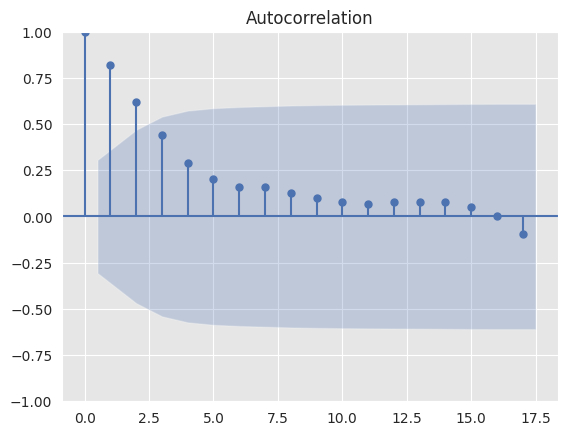

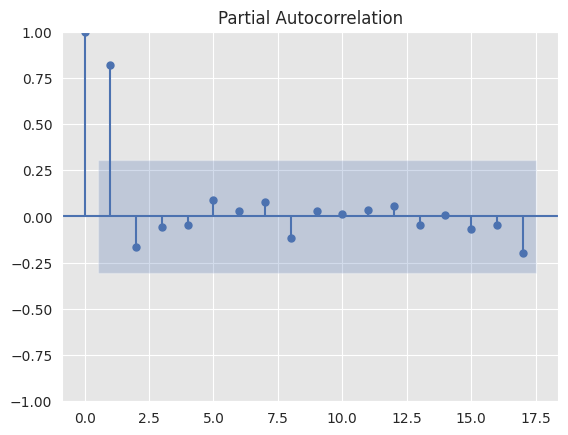

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF plot (for q) MA(q)
plot_acf(df['y'])
plt.show()

# PACF plot (for p) AR(p)
plot_pacf(df['y'])
plt.show()

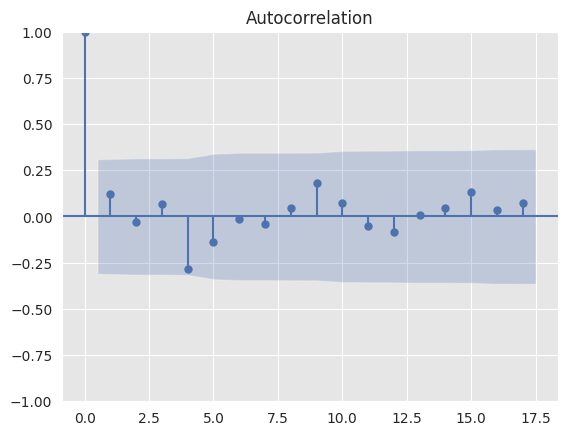

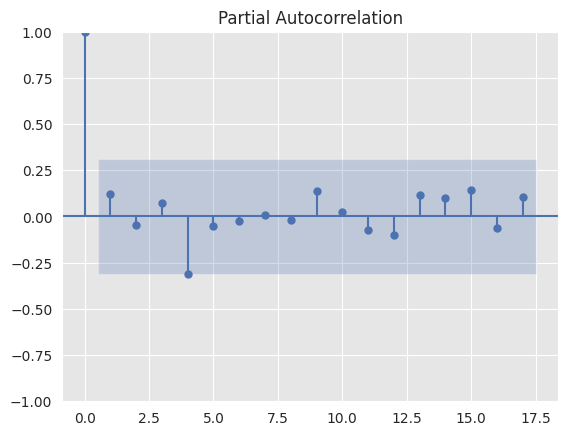

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# the series with the first difference

# ACF plot (for q) MA(q)
plot_acf(df['y'].diff().dropna())
plt.show()

# PACF plot (for p) AR(p)
plot_pacf(df['y'].diff().dropna())
plt.show()

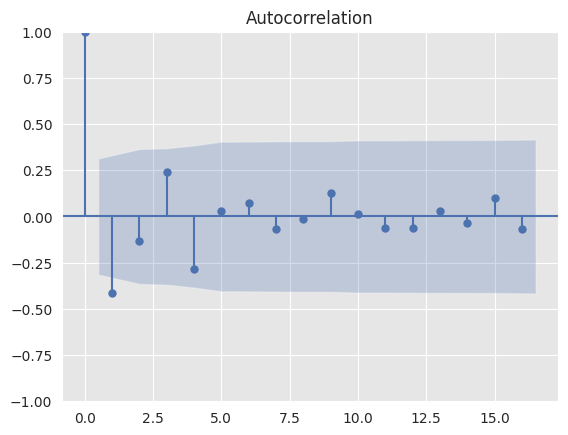

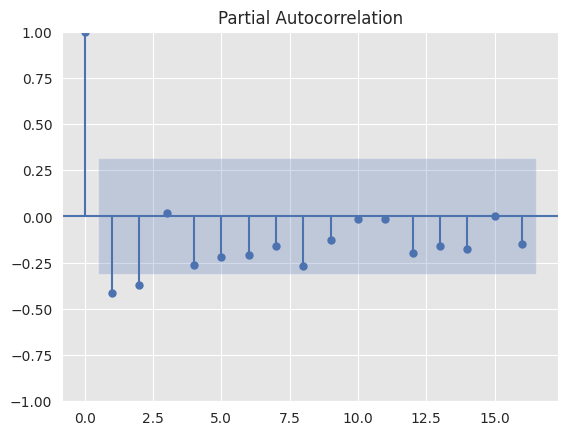

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# the series with the second difference

# ACF plot (for q) MA(q)
plot_acf(df['y'].diff().dropna().diff().dropna())
plt.show()

# PACF plot (for p) AR(p)
plot_pacf(df['y'].diff().dropna().diff().dropna())
plt.show()

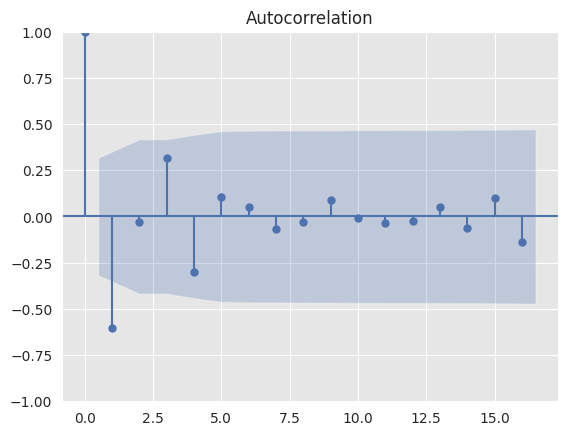

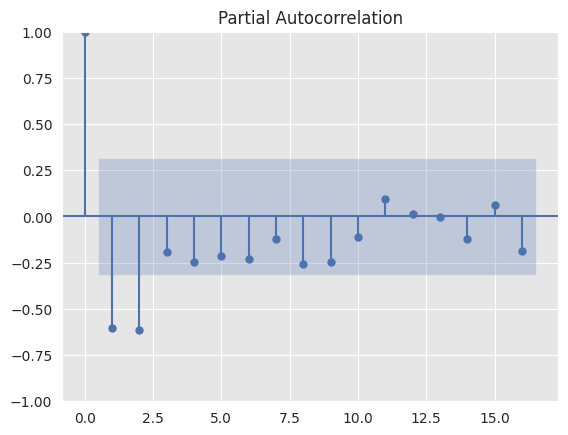

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# the series with the third difference

# ACF plot (for q) MA(q)
plot_acf(df['y'].diff().dropna().diff().dropna().diff().dropna())
plt.show()

# PACF plot (for p) AR(p)
plot_pacf(df['y'].diff().dropna().diff().dropna().diff().dropna())
plt.show()

## Dividing the dataset into train and test to calculate the effect of the new marketing campaign that was launched two months ago

In [ ]:
# The marketing campaign was launched two months ago
df_model = df.loc[df['ds'] < yyyymm_begin_str]
df_test = df.loc[df['ds'] >= yyyymm_begin_str]

## Getting the forecast of organic consumers for these two months

In [ ]:
# Fit a SARIMA model
# Assuming seasonality repeats every 12 months (you can adjust this to match your data)

# putting here p, d, q parameters that were identified before
order = (2, 2, 2)

smodel = train_sarima_model(df_model = df_model, y=y, order=order, random_state=random_state) 

model_sarimax = SARIMAX(
        endog=df_model[y],
        exog=df_model[['media_channel_1', 'media_channel_2', 'media_channel_3', 'media_channel_4', 'media_channel_5', 'media_channel_6']],
        order=smodel.order,
        seasonal_order=smodel.seasonal_order,
    )

model_sarimax_fit = model_sarimax.fit()

forecast_steps = 2

# Forecast the next 2 months
forecast_sarimax = model_sarimax_fit.get_forecast(steps=forecast_steps, exog=df_test[['media_channel_1', 'media_channel_2', 'media_channel_3', 'media_channel_4', 'media_channel_5', 'media_channel_6']])

# Get the forecasted mean values and confidence intervals
forecast = forecast_sarimax.predicted_mean
conf_int = forecast_sarimax.conf_int()

conf_int_no_bounds = conf_int.copy()
forecast_no_bounds = forecast.copy()

conf_int_mean = conf_int_no_bounds.mean(axis=0)
diff = conf_int_mean['upper organics'] - conf_int_mean['lower organics']
range_stat = int((diff/forecast_no_bounds.mean())*100)

forecast = pd.Series(np.max((forecast, forecast_steps*[0]), axis=0))
conf_int.loc[conf_int["lower organics"] < 0, "lower organics"] = 0
conf_int.loc[conf_int["upper organics"] < 0, "upper organics"] = 0

# Create a new index for the forecast dates
forecast_index = np.arange(df_model.index[-1], df_model.index[-1] + forecast_steps + 1)[1:]

# Combine the last observed value with the forecast to make a smooth line
last_observed_value = df_model[y].iloc[-1]
forecast_with_last = pd.Series([last_observed_value] + list(forecast), index=[df_model.index[-1]] + list(forecast_index))

# Plot observed data
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Observed')

# Plot forecast, including the last observed value to make the lines continuous
plt.plot([df_model['ds'].values[-1]] + list(df_test['ds']), forecast_with_last, label='Forecast', color='red', linestyle='--')

plt.fill_between(list(df_test['ds']), 
                 conf_int.iloc[:, 0],  # Lower bound
                 conf_int.iloc[:, 1],  # Upper bound
                 color='pink', alpha=0.3, label='95% Confidence Interval')

# Add title and legend
plt.title('SARIMAX Forecast with Connected Line to Observed Data (endog = organics)')
plt.legend()
plt.show()

![My Image](images/SARIMAX_pict.png)

In [ ]:
# The forecasted mean values and confidence intervals
forecast = forecast_sarimax.predicted_mean
conf_int = forecast_sarimax.conf_int()

res = pd.DataFrame({
    'Date': list(df_test['ds']),
    'Left int': list(map(round, conf_int.iloc[:, 0])),
    'Predict': list(map(round, forecast)),
    'Right int': list(map(round, conf_int.iloc[:, 1])),
    'Real': df_test['y']
}).set_index('Date')

res['Left diff'] = res['Real'] - res['Left int']
res['Diff'] = res['Real'] - res['Predict']
res['Right diff'] = res['Real'] - res['Right int']
res

## Getting the effect of the marketing campaign, contribution of each media channel and SARIMAX results with RMSE of the model created

In [ ]:
print(f'The effect: {round(np.sum(df_test["y"]) - np.sum(forecast), 2)}')

print()

print(f'The effect: {round((np.sum(df_test["y"]) - np.sum(forecast))/(np.sum(df_test["y"])) * 100, 2)}%')

print()

print(f'Range: {abs(range_stat)}%')

print()

# Calculate RMSE between the actual values and the fitted values
rmse = np.sqrt(mean_squared_error(df_test["y"], forecast.values))

# Print the RMSE
print(f'RMSE: {rmse:.3f}')

print()

pvalues_sarimax = (1 - model_sarimax_fit.pvalues).fillna(0)

sum_pvalues = pvalues_sarimax[['media_channel_1', 'media_channel_2', 'media_channel_3', 'media_channel_4', 'media_channel_5', 'media_channel_6']].sum()

media_channel_1_contr = ((pvalues_sarimax['media_channel_1'])/sum_pvalues)* 100
media_channel_2_contr = ((pvalues_sarimax['media_channel_2'])/sum_pvalues) * 100
media_channel_3_contr = ((pvalues_sarimax['media_channel_3'])/sum_pvalues) * 100
media_channel_4_contr = ((pvalues_sarimax['media_channel_4'])/sum_pvalues) * 100
media_channel_5_contr = ((pvalues_sarimax['media_channel_5'])/sum_pvalues) * 100
media_channel_6_contr = ((pvalues_sarimax['media_channel_6'])/sum_pvalues) * 100

print(f'media_channel_1_contribution = {media_channel_1_contr:.2f}%')
print(f'media_channel_2_contribution = {media_channel_2_contr:.2f}%')
print(f'media_channel_3_contribution = {media_channel_3_contr:.2f}%')
print(f'media_channel_4_contribution = {media_channel_4_contr:.2f}%')
print(f'media_channel_5_contribution = {media_channel_5_contr:.2f}%')
print(f'media_channel_6_contribution = {media_channel_6_contr:.2f}%')

print(model_sarimax_fit.summary())